In [2]:
#import needed packages
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from datetime import datetime as dt
from statsmodels.graphics.gofplots import ProbPlot

import plotly.express as px

import sklearn
from sklearn.feature_selection import VarianceThreshold
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import cluster
from sklearn.cluster import KMeans, MiniBatchKMeans
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from matplotlib import cm

# Libraries needed for hierarchical clustering.
from scipy import cluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from collections import Counter

#import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from matplotlib.legend_handler import HandlerLine2D

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot

import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [3]:
#set directory
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
data_dir= str(main_dir)+'\Data'

os.chdir(data_dir)

In [81]:
lego_subset= pd.read_csv('LEGO_subset1.csv')
print(lego_subset.shape)
lego_subset.head()
lego_subset= lego_subset.drop(columns=['Unnamed: 0'])
lego_subset.head()

(10165, 8)


,list_price,piece_count,num_reviews,review_difficulty,star_rating,country_num,min_age
0,29.99,277.0,2.0,3,4.5,1,6.0
1,19.99,168.0,2.0,2,5.0,1,6.0
2,12.99,74.0,11.0,2,4.3,1,6.0
3,99.99,1032.0,23.0,3,4.6,1,12.0
4,79.99,744.0,14.0,4,4.6,1,12.0


# SVC

In [82]:
lego_subset['star_rating'] = np.where(lego_subset['star_rating'] > 4.5, True, False)

lego_subset = lego_subset.sample(n=2000, random_state=1)

columns_to_drop_from_X = ['star_rating']
X = lego_subset.drop(columns_to_drop_from_X, axis = 1)
y = np.array(lego_subset['star_rating'])

np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
counter= Counter(y_train)

In [83]:
svclassifier = SVC(kernel = 'linear',
                     probability = True)
svclassifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [84]:
svc_y_predict = svclassifier.predict(X_test)
svc_y_predict[0:5]

svc_y_predict_prob = svclassifier.predict_proba(X_test) 
print(svc_y_predict_prob[5:])

[[0.40246583 0.59753417]
 [0.54374717 0.45625283]
 [0.46605605 0.53394395]
 ...
 [0.58572562 0.41427438]
 [0.56516652 0.43483348]
 [0.43373531 0.56626469]]


In [85]:
def get_performance_scores(y_test, y_predict, y_predict_prob, eps=1e-15, beta=0.5):
    
    from sklearn import metrics
    
    # Scores keys.
    metric_keys = ["accuracy", "precision", "recall", "f1", "fbeta", "log_loss", "AUC"]
    
    # Score values.
    metric_values = [None]*len(metric_keys)
    
    metric_values[0] = metrics.accuracy_score(y_test, y_predict)
    metric_values[1] = metrics.precision_score(y_test, y_predict)
    metric_values[2] = metrics.recall_score(y_test, y_predict)
    metric_values[3] = metrics.f1_score(y_test, y_predict)
    metric_values[4] = metrics.fbeta_score(y_test, y_predict, beta=beta)
    metric_values[5] = metrics.log_loss(y_test, y_predict_prob[:, 1], eps=eps)
    metric_values[6] = metrics.roc_auc_score(y_test, y_predict_prob[:, 1])
    
    perf_metrics = dict(zip(metric_keys, metric_values))
    
    return(perf_metrics)

svc_scores = get_performance_scores(y_test, svc_y_predict, svc_y_predict_prob)
print(svc_scores)

{'accuracy': 0.525, 'precision': 0.671875, 'recall': 0.36752136752136755, 'f1': 0.47513812154696133, 'fbeta': 0.5764075067024129, 'log_loss': 0.6757823989290086, 'AUC': 0.590681815581414}


C:\Users\625737\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


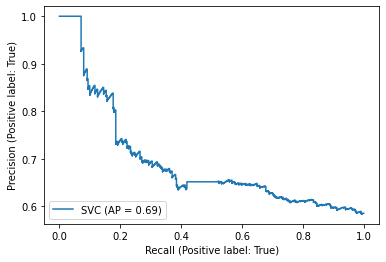

In [86]:
svc_prec_recall = metrics.plot_precision_recall_curve(svclassifier, 
                               X_test, y_test, 
                               name = "SVC")
plt.show()

C:\Users\625737\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


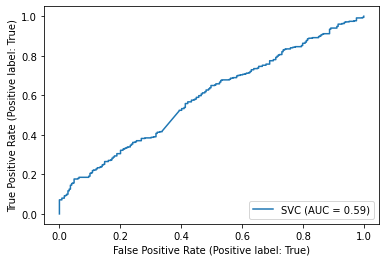

In [87]:
svc_roc = metrics.plot_roc_curve(svclassifier,
                                X_test,
                                y_test,
                                name = "SVC")
plt.show()

In [112]:
metrics_svm= pickle.load(open('metrics_forest.sav', 'rb'))

In [113]:
metrics_svm.update({"SVC": svc_scores})
print(metrics_svm)

{'RF': {'accuracy': 0.9875459949051797, 'precision': 0.9881756756756757, 'recall': 0.9870641169853769, 'f1': 0.987619583567811, 'fbeta': 0.9879531637018689, 'log_loss': 0.07432353040658878, 'AUC': 0.998903181974048}, 'Optimized RF': {'accuracy': 0.9889612227568638, 'precision': 0.9871148459383754, 'recall': 0.9910011248593926, 'f1': 0.9890541678360932, 'fbeta': 0.9878896613590492, 'log_loss': 0.07366093396013212, 'AUC': 0.9989837808735446}, 'GBM': {'accuracy': 0.6940983606557377, 'precision': 0.7533172496984318, 'recall': 0.7044557247602933, 'f1': 0.7280676187700378, 'fbeta': 0.7430101130279596, 'log_loss': 0.5758913831617422, 'AUC': 0.7696931833590166}, 'Optimized GBM': {'accuracy': 0.9960655737704918, 'precision': 0.9954980303882949, 'recall': 0.9977439368302312, 'f1': 0.9966197183098592, 'fbeta': 0.9959464024321585, 'log_loss': 0.030289593676501837, 'AUC': 0.999907248773365}, 'SVC': {'accuracy': 0.525, 'precision': 0.671875, 'recall': 0.36752136752136755, 'f1': 0.47513812154696133, 

# SVM

In [90]:
sv_machine = SVC(kernel = 'rbf', 
                    gamma = 0.011,
                   probability = True)
sv_machine.fit(X_train, y_train)

SVC(gamma=0.011, probability=True)

In [91]:
svm_y_predict = sv_machine.predict(X_test)
svm_y_predict[0:5]

svm_y_predict_prob = sv_machine.predict_proba(X_test) 
print(svm_y_predict_prob[5:])

[[0.08878226 0.91121774]
 [0.86905852 0.13094148]
 [0.38012668 0.61987332]
 ...
 [0.78823884 0.21176116]
 [0.94194416 0.05805584]
 [0.182838   0.817162  ]]


In [92]:
def get_performance_scores(y_test, y_predict, y_predict_prob, eps=1e-15, beta=0.5):
    from sklearn import metrics
    # Scores keys.
    metric_keys = ["accuracy", "precision", "recall", "f1", "fbeta", "log_loss", "AUC"]
    # Score values.
    metric_values = [None]*len(metric_keys)
    metric_values[0] = metrics.accuracy_score(y_test, y_predict)
    metric_values[1] = metrics.precision_score(y_test, y_predict)
    metric_values[2] = metrics.recall_score(y_test, y_predict)
    metric_values[3] = metrics.f1_score(y_test, y_predict)
    metric_values[4] = metrics.fbeta_score(y_test, y_predict, beta=beta)
    metric_values[5] = metrics.log_loss(y_test, y_predict_prob[:, 1], eps=eps)
    metric_values[6] = metrics.roc_auc_score(y_test, y_predict_prob[:, 1])
    perf_metrics = dict(zip(metric_keys, metric_values))
    return(perf_metrics)

svm_scores = get_performance_scores(y_test, svm_y_predict, svm_y_predict_prob)
print(svm_scores)

{'accuracy': 0.805, 'precision': 0.8268156424581006, 'recall': 0.8433048433048433, 'f1': 0.8349788434414669, 'fbeta': 0.8300616937745373, 'log_loss': 0.4405553211233816, 'AUC': 0.8764173503129327}


C:\Users\625737\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


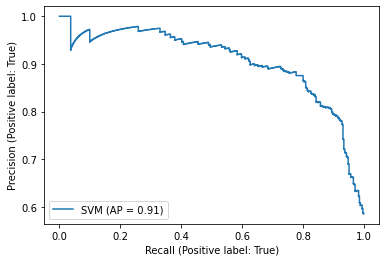

In [93]:
ax = plt.gca()
svm_prec_recall = metrics.plot_precision_recall_curve(sv_machine,
                                 X_test, 
                                 y_test,
                                 ax = ax,
                                 name = "SVM")
plt.show()

C:\Users\625737\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


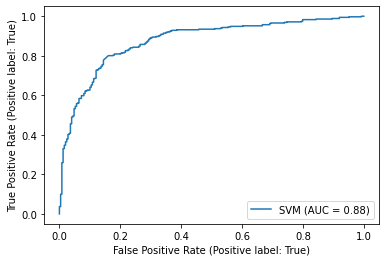

In [94]:
ax = plt.gca()
svm_roc = metrics.plot_roc_curve(sv_machine,
                       X_test,
                       y_test,
                       name = "SVM",
                       ax = ax)
plt.show()

In [114]:
metrics_svm.update({"SVM": svm_scores})
print(metrics_svm)

{'RF': {'accuracy': 0.9875459949051797, 'precision': 0.9881756756756757, 'recall': 0.9870641169853769, 'f1': 0.987619583567811, 'fbeta': 0.9879531637018689, 'log_loss': 0.07432353040658878, 'AUC': 0.998903181974048}, 'Optimized RF': {'accuracy': 0.9889612227568638, 'precision': 0.9871148459383754, 'recall': 0.9910011248593926, 'f1': 0.9890541678360932, 'fbeta': 0.9878896613590492, 'log_loss': 0.07366093396013212, 'AUC': 0.9989837808735446}, 'GBM': {'accuracy': 0.6940983606557377, 'precision': 0.7533172496984318, 'recall': 0.7044557247602933, 'f1': 0.7280676187700378, 'fbeta': 0.7430101130279596, 'log_loss': 0.5758913831617422, 'AUC': 0.7696931833590166}, 'Optimized GBM': {'accuracy': 0.9960655737704918, 'precision': 0.9954980303882949, 'recall': 0.9977439368302312, 'f1': 0.9966197183098592, 'fbeta': 0.9959464024321585, 'log_loss': 0.030289593676501837, 'AUC': 0.999907248773365}, 'SVC': {'accuracy': 0.525, 'precision': 0.671875, 'recall': 0.36752136752136755, 'f1': 0.47513812154696133, 

# SVM Optimized

In [96]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                        'C': [1, 10, 100, 1000]}]

svm_cv = GridSearchCV(SVC(), tuned_parameters, cv = 5)
svm_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [97]:
print(svm_cv.best_params_)
optmized_c = svm_cv.best_params_['C']
optmized_gamma = svm_cv.best_params_['gamma']
optmized_kernel = svm_cv.best_params_['kernel']

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [98]:
sv_cv_optimized = SVC(kernel = optmized_kernel,
                        gamma = optmized_gamma, 
                        C = optmized_c,
                        probability = True)
sv_cv_optimized.fit(X_train, y_train)

SVC(C=1000, gamma=0.001, probability=True)

In [99]:
opt_svm_y_predict = sv_cv_optimized.predict(X_test)
opt_svm_y_predict[0:5]

opt_svm_y_predict_prob = sv_cv_optimized.predict_proba(X_test) 
print(opt_svm_y_predict_prob[5:])

[[0.29098336 0.70901664]
 [0.98557466 0.01442534]
 [0.5        0.5       ]
 ...
 [0.92819263 0.07180737]
 [0.91329977 0.08670023]
 [0.01813173 0.98186827]]


In [100]:
opt_svm_scores = get_performance_scores(y_test, opt_svm_y_predict, opt_svm_y_predict_prob)
print(opt_svm_scores)

{'accuracy': 0.8333333333333334, 'precision': 0.8814589665653495, 'recall': 0.8262108262108262, 'f1': 0.8529411764705883, 'fbeta': 0.8698260347930413, 'log_loss': 0.4599390300430635, 'AUC': 0.8777159921738235}


C:\Users\625737\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


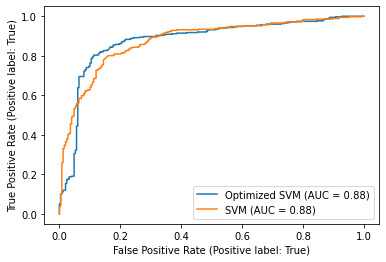

In [101]:
ax = plt.gca()
opt_svm_roc = metrics.plot_roc_curve(sv_cv_optimized,
                       X_test,
                       y_test,
                       name = "Optimized SVM",
                       ax = ax)
svm_roc.plot(ax = ax, name = "SVM")
plt.show()

In [115]:
metrics_svm.update({"Optimized SVM": opt_svm_scores})
print(metrics_svm)
metrics_svm_df = pd.DataFrame(metrics_svm)
metrics_svm_df["metric"] = metrics_svm_df.index
metrics_svm_df = metrics_svm_df.reset_index(drop = True)
print(metrics_svm_df.head())

{'RF': {'accuracy': 0.9875459949051797, 'precision': 0.9881756756756757, 'recall': 0.9870641169853769, 'f1': 0.987619583567811, 'fbeta': 0.9879531637018689, 'log_loss': 0.07432353040658878, 'AUC': 0.998903181974048}, 'Optimized RF': {'accuracy': 0.9889612227568638, 'precision': 0.9871148459383754, 'recall': 0.9910011248593926, 'f1': 0.9890541678360932, 'fbeta': 0.9878896613590492, 'log_loss': 0.07366093396013212, 'AUC': 0.9989837808735446}, 'GBM': {'accuracy': 0.6940983606557377, 'precision': 0.7533172496984318, 'recall': 0.7044557247602933, 'f1': 0.7280676187700378, 'fbeta': 0.7430101130279596, 'log_loss': 0.5758913831617422, 'AUC': 0.7696931833590166}, 'Optimized GBM': {'accuracy': 0.9960655737704918, 'precision': 0.9954980303882949, 'recall': 0.9977439368302312, 'f1': 0.9966197183098592, 'fbeta': 0.9959464024321585, 'log_loss': 0.030289593676501837, 'AUC': 0.999907248773365}, 'SVC': {'accuracy': 0.525, 'precision': 0.671875, 'recall': 0.36752136752136755, 'f1': 0.47513812154696133, 

In [119]:
metrics_forest_long = pd.melt(metrics_svm_df, 
                              id_vars = "metric",
                              var_name = "model",
                              value_vars = list(metrics_svm.keys()))
print(metrics_forest_long.head())

      metric model     value
0   accuracy    RF  0.987546
1  precision    RF  0.988176
2     recall    RF  0.987064
3         f1    RF  0.987620
4      fbeta    RF  0.987953


TypeError: tight_layout() takes 0 positional arguments but 1 was given

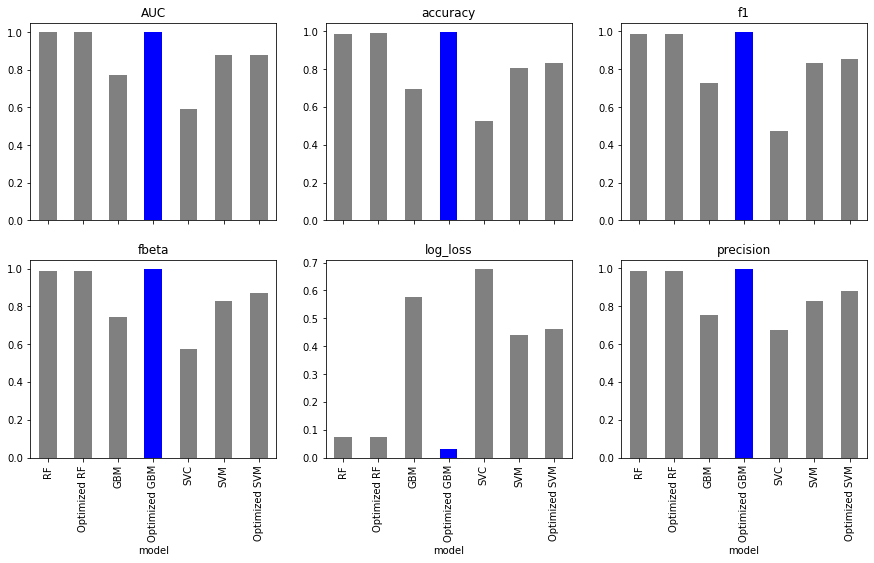

In [132]:
fig, axes = plt.subplots(2, 3, figsize = (15, 8))
for (metric, group), ax in zip(metrics_forest_long.groupby("metric"), axes.flatten()):
    group.plot(x = 'model', 
               y = 'value', 
               kind = 'bar', 
               color = ["grey", "grey", "grey", 'blue', "grey", "grey", "grey"],
               ax = ax, 
               title = metric,
               legend = None,
               sharex = True)
    ax.xaxis.set_tick_params(rotation = 90)
plt.tight_layout(0.5)
plt.show()

In [116]:
def compare_metrics(metrics_dict, color_list = None):
    
    import pandas as pd
    import matplotlib.pyplot as plt
    
    metrics_df = pd.DataFrame(metrics_dict)
    metrics_df["metric"] = metrics_df.index
    metrics_df = metrics_df.reset_index(drop = True)
    metrics_long = pd.melt(metrics_df,
                           id_vars = "metric",
                           var_name = "model",
                           value_vars = list(metrics_dict.keys()))
    
    if color_list is None:
        cmap = plt.rcParams['axes.prop_cycle'].by_key()['color']
        colors = cmap[:len(metrics_dict.keys())]
    else:
        colors = color_list
    fig, axes = plt.subplots(2, 3, figsize = (15, 8))
    for (metric, group), ax in zip(metrics_long.groupby("metric"), axes.flatten()):
        group.plot(x = 'model', 
                   y = 'value', 
                   kind = 'bar',
                   color = colors,
                   ax = ax,
                   title = metric,
                   legend = None,
                   sharex = True)
        
        ax.xaxis.set_tick_params(rotation = 45)
    plt.tight_layout(0.5)
     
    return((fig, axes))

TypeError: tight_layout() takes 0 positional arguments but 1 was given

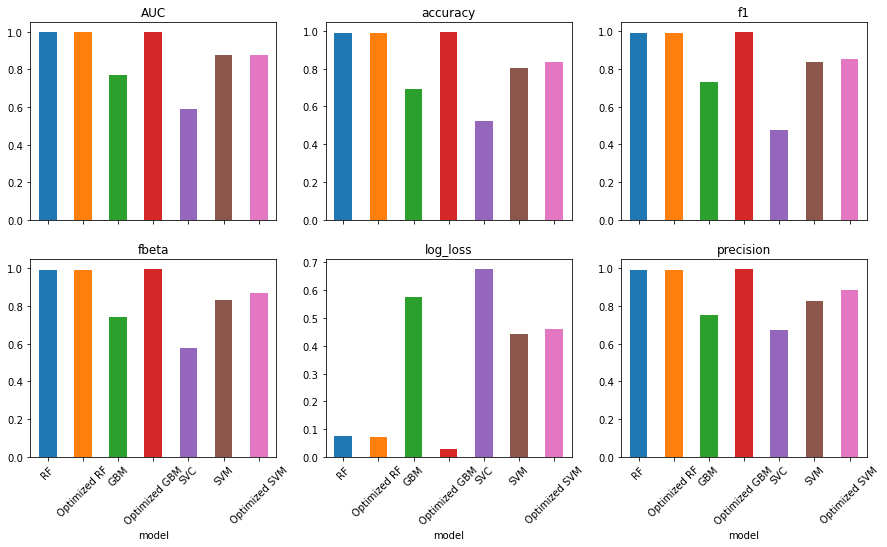

In [117]:
fig, axes = compare_metrics(metrics_svm)
plt.show()

In [ ]:
metrics_svm= pd.DataFrame(metrics_svm)

In [78]:
metrics_svm

,RF,Optimized RF,GBM,Optimized GBM,SVC,SVM,Optimized SVM
accuracy,0.986557,0.987213,0.729975,0.996603,0.518629,0.822653,0.871833
precision,0.983410,0.983982,0.730233,0.993174,0.587629,0.850000,0.916923
recall,0.993068,0.993645,0.719359,1.000000,0.319328,0.809524,0.834734
f1,0.988215,0.988790,0.724755,0.996575,0.413793,0.829268,0.873900
fbeta,0.985326,0.985899,0.728032,0.994532,0.503089,0.841584,0.899215
log_loss,0.082939,0.083146,0.549785,0.031766,0.672395,0.424242,0.415263
AUC,0.999136,0.999173,0.802556,0.999362,0.554283,0.893156,0.912229
